In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
#import matplotlib.colors as colors
plt.style.use('seaborn-colorblind')


In [2]:
accepted = pd.read_csv("C:\\Users\\nilli\\Downloads\\lending-club\\accepted_before_2015.csv")


C:\Users\nilli\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (18,48,128,129,130,133,134,135,138) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
accepted.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,36805548,10400.0,10400.0,10400.0,36 months,6.99,321.08,A,A3,Truck Driver Delivery Personel,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,38098114,15000.0,15000.0,15000.0,60 months,12.39,336.64,C,C1,MANAGEMENT,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,37822187,9600.0,9600.0,9600.0,36 months,13.66,326.53,C,C3,Admin Specialist,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,37662224,7650.0,7650.0,7650.0,36 months,13.66,260.20,C,C3,Technical Specialist,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,37612354,12800.0,12800.0,12800.0,60 months,17.14,319.08,D,D4,Senior Sales Professional,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
accepted.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=150)

In [5]:
accepted['grade'].value_counts()

B    136947
C    125314
D     76900
A     74871
E     35759
F     13232
G      3322
Name: grade, dtype: int64

In [6]:
accepted['term'].value_counts()

 36 months    337996
 60 months    128349
Name: term, dtype: int64

In [7]:
accepted[['grade','term']].groupby('grade').count()

,term
grade,
A,74871
B,136947
C,125314
D,76900
E,35759
F,13232
G,3322


In [8]:
 accepted['loan_amnt'].agg(['max', 'min'])# range of loan amount borrowed

max    35000.0
min      500.0
Name: loan_amnt, dtype: float64

In [9]:
accepted['int_rate'].agg(['max', 'min'])

max    26.06
min     5.42
Name: int_rate, dtype: float64

In [10]:
accepted[['grade','term','loan_amnt']].groupby('grade').agg(['max', 'min', 'count'])

term                     loan_amnt                
              max         min   count       max     min   count
grade                                                          
A       60 months   36 months   74871   35000.0   500.0   74871
B       60 months   36 months  136947   35000.0   500.0  136947
C       60 months   36 months  125314   35000.0   500.0  125314
D       60 months   36 months   76900   35000.0   500.0   76900
E       60 months   36 months   35759   35000.0   600.0   35759
F       60 months   36 months   13232   35000.0  1000.0   13232
G       60 months   36 months    3322   35000.0   600.0    3322

In [11]:
accepted.select_dtypes(include ='object').columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type',
       'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status',
       'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date',
       'hardship_loan_status', 'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date'],
      dtype='object')

In [12]:
accepted['loan_status'].value_counts()

Fully Paid                                             374560
Charged Off                                             76499
Current                                                 11925
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Late (31-120 days)                                        337
In Grace Period                                           201
Late (16-30 days)                                          73
Default                                                     1
Name: loan_status, dtype: int64

In [13]:
accepted.groupby(['grade','term']).size()

grade  term      
A       36 months     72888
        60 months      1983
B       36 months    120242
        60 months     16705
C       36 months     84979
        60 months     40335
D       36 months     43952
        60 months     32948
E       36 months     12393
        60 months     23366
F       36 months      3104
        60 months     10128
G       36 months       438
        60 months      2884
dtype: int64

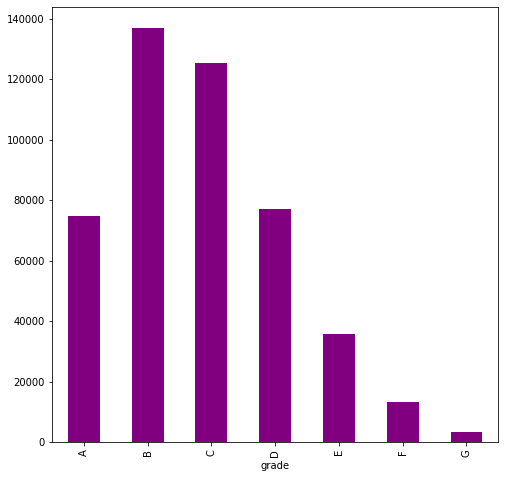

In [14]:
plt.figure(figsize=(8,8))
accepted.groupby(['grade']).size().plot(kind ='bar', color ='purple' ) 

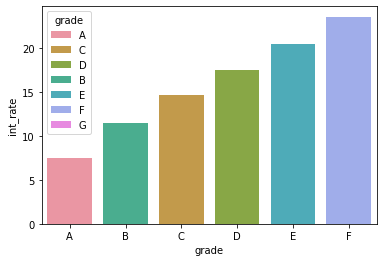

In [15]:
sns.barplot(x="grade",
y='int_rate',
            hue="grade",
data=accepted, dodge = False, order =['A','B','C','D','E','F']) 
plt.style.use('seaborn-colorblind')

In [16]:
accepted.groupby(['grade','sub_grade','term']).size()

grade  sub_grade  term      
A      A1          36 months    10542
       A2          36 months    10942
                   60 months       14
       A3          36 months    12528
                   60 months       41
                                ...  
G      G3          60 months      525
       G4          36 months       65
                   60 months      357
       G5          36 months       70
                   60 months      315
Length: 69, dtype: int64

In [17]:
# dfr =accepted.groupby(['grade','term','loan_status']).size()

In [18]:
accepted.groupby(['grade','term'])['loan_status'].size()

grade  term      
A       36 months     72888
        60 months      1983
B       36 months    120242
        60 months     16705
C       36 months     84979
        60 months     40335
D       36 months     43952
        60 months     32948
E       36 months     12393
        60 months     23366
F       36 months      3104
        60 months     10128
G       36 months       438
        60 months      2884
Name: loan_status, dtype: int64

In [19]:
# ['earliest_cr_line',] ##credit history
# ['emp_title', 'emp_length',
#        'home_ownership','zip_code',
#        'addr_state', ]##  demographics information

In [20]:
accepted[['loan_amnt', 'funded_amnt', 'funded_amnt_inv']] 
# 'loan_amnt': The listed amount of the loan applied for by the borrower
#  'funded_amnt' :The total amount committed to that loan at that point in time.
#'funded_amnt_inv' :
#The total amount committed by investors for that loan at that point in time.

,loan_amnt,funded_amnt,funded_amnt_inv
0,10400.0,10400.0,10400.0
1,15000.0,15000.0,15000.0
2,9600.0,9600.0,9600.0
3,7650.0,7650.0,7650.0
4,12800.0,12800.0,12800.0
...,...,...,...
466340,20500.0,20500.0,20500.0
466341,15000.0,15000.0,15000.0
466342,35000.0,35000.0,35000.0
466343,12000.0,12000.0,12000.0


In [21]:
#accepted.investor_count
# date_cols = [col for col in accepted.columns if 'inv'in col]
# print(date_cols)
#'out_prncp_inv' :Remaining outstanding principal for portion of total amount funded by investors
#'total_pymnt_inv'  :Payments received to date for portion of total amount funded by investors

In [22]:
date_cols = [col for col in accepted.columns if 'amnt'in col]
print(date_cols)

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'last_pymnt_amnt', 'delinq_amnt']


In [23]:
accepted[(accepted['loan_amnt']-accepted['funded_amnt'])>0]['grade'].sort_values()

259539    A
258375    A
258389    A
258391    A
258393    A
         ..
278131    G
259000    G
258999    G
250272    G
277349    G
Name: grade, Length: 2062, dtype: object

In [24]:
accepted[(accepted['loan_amnt']-accepted['funded_amnt'])<=0].count()

id                       464283
loan_amnt                464283
funded_amnt              464283
funded_amnt_inv          464283
term                     464283
                          ...  
settlement_status          6436
settlement_date            6436
settlement_amount          6436
settlement_percentage      6436
settlement_term            6436
Length: 150, dtype: int64

In [25]:
accepted.shape

(466345, 150)

In [26]:
(466345 -464283)*100/466345


0.4421619187511392

for .44% of the loan the amount requested is less than the amount given, grades from A to G

In [27]:
accepted['funded_amnt'].describe()

count    466345.000000
mean      14291.647814
std        8274.220507
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       35000.000000
Name: funded_amnt, dtype: float64

In [28]:
accepted['issue_d'] = accepted['issue_d'].astype('datetime64[ns]')

In [29]:
# Lets' transform the issue dates by year.
accepted['issue_d'].head()
dt_series = pd.to_datetime(accepted['issue_d'])
accepted['year'] = dt_series.dt.year

In [30]:
accepted['year']

0         2014
1         2014
2         2014
3         2014
4         2014
          ... 
466340    2012
466341    2012
466342    2012
466343    2012
466344    2012
Name: year, Length: 466345, dtype: int64

In [31]:
accepted['issue_d']

0        2014-12-01
1        2014-12-01
2        2014-12-01
3        2014-12-01
4        2014-12-01
            ...    
466340   2012-01-01
466341   2012-01-01
466342   2012-01-01
466343   2012-01-01
466344   2012-01-01
Name: issue_d, Length: 466345, dtype: datetime64[ns]

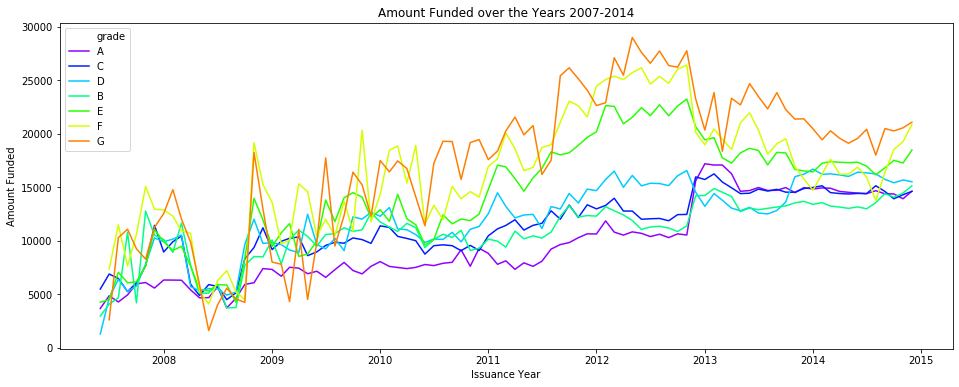

In [32]:
# plt.figure(figsize=(12,16))
# sns.lineplot(x="issue_d", y='funded_amnt',data=accepted)
# plt.title('Amount Funded over the Years 2007-2014')
# plt.xlabel('Issuance Year')
#plt.ylabel('Amount Funded')
plt.figure(figsize=(16,6))
palette = sns.color_palette("gist_rainbow_r", 7)
sns.lineplot(x="issue_d", y='funded_amnt',hue ='grade',ci= None, 
             palette = palette, data=accepted)
plt.title('Amount Funded over the Years 2007-2014')
plt.xlabel('Issuance Year')
plt.ylabel('Amount Funded')
plt.savefig('AmountFundedovertheYears2007-2014o.png')

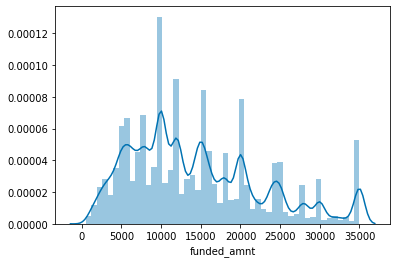

In [33]:
#accepted['funded_amnt']
sns.distplot(accepted['funded_amnt'])

In [34]:
accepted['int_rate']

0          6.99
1         12.39
2         13.66
3         13.66
4         17.14
          ...  
466340    16.77
466341    15.27
466342    15.96
466343    16.29
466344    15.27
Name: int_rate, Length: 466345, dtype: float64

In [35]:
accepted['int_rate_bins'] = pd.cut(x=accepted['int_rate'], bins=5)
accepted['int_rate_bins'] 

0           (5.399, 9.548]
1          (9.548, 13.676]
2          (9.548, 13.676]
3          (9.548, 13.676]
4         (13.676, 17.804]
                ...       
466340    (13.676, 17.804]
466341    (13.676, 17.804]
466342    (13.676, 17.804]
466343    (13.676, 17.804]
466344    (13.676, 17.804]
Name: int_rate_bins, Length: 466345, dtype: category
Categories (5, interval[float64]): [(5.399, 9.548] < (9.548, 13.676] < (13.676, 17.804] < (17.804, 21.932] < (21.932, 26.06]]

In [36]:
accepted['int_rate_bins'].nunique()

5

In [37]:
accepted['purpose']

0                credit_card
1         debt_consolidation
2         debt_consolidation
3         debt_consolidation
4                        car
                 ...        
466340    debt_consolidation
466341        small_business
466342        small_business
466343                 other
466344           credit_card
Name: purpose, Length: 466345, dtype: object

In [38]:
accepted.groupby(['grade','purpose']).size()

grade  purpose           
A      car                    1589
       credit_card           23425
       debt_consolidation    37178
       educational              88
       home_improvement       5068
                             ...  
G      other                   411
       renewable_energy          8
       small_business          264
       vacation                 13
       wedding                  25
Length: 98, dtype: int64

In [39]:
accepted['purpose'].nunique()

14

In [40]:
accepted[accepted['loan_status']=='Fully Paid'].count()

id                       374560
loan_amnt                374560
funded_amnt              374560
funded_amnt_inv          374560
term                     374560
                          ...  
settlement_amount             0
settlement_percentage         0
settlement_term               0
year                     374560
int_rate_bins            374560
Length: 152, dtype: int64

In [41]:
accepted[accepted['loan_status']!='Fully Paid'].count()

id                       91785
loan_amnt                91785
funded_amnt              91785
funded_amnt_inv          91785
term                     91785
                         ...  
settlement_amount         6449
settlement_percentage     6449
settlement_term           6449
year                     91785
int_rate_bins            91785
Length: 152, dtype: int64

In [42]:
len(accepted['loan_status'])

466345

percentages of non-completed loans in each loan grade/subgrade 
(i.e. default, charged off) 

In [43]:
len(accepted[accepted['loan_status']!='Fully Paid'])*100/len(accepted['loan_status'])

19.68178065595214

In [44]:
len(accepted[accepted['loan_status']=='Fully Paid'])*100/len(accepted['loan_status'])

80.31821934404786

In [45]:
accepted['purpose'].value_counts()

debt_consolidation    274233
credit_card           104169
home_improvement       26541
other                  23692
major_purchase          9828
small_business          7014
car                     5398
medical                 4603
moving                  2995
vacation                2487
wedding                 2343
house                   2269
educational              422
renewable_energy         351
Name: purpose, dtype: int64

In [46]:
accepted['loan_status'].value_counts()

Fully Paid                                             374560
Charged Off                                             76499
Current                                                 11925
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Late (31-120 days)                                        337
In Grace Period                                           201
Late (16-30 days)                                          73
Default                                                     1
Name: loan_status, dtype: int64

In [47]:
# Only defaulted loans:
default_cat = ['Default', 'Charged Off', 'Does not meet the credit policy. Status:Charged Off']

# accepted[accepted['loan_status'].isin(default_cat)].describe().T
# # check out the average interest rate and dti (debt-to-income)

In [48]:
pd.options.display.max_rows

60

In [49]:
pd.options.display.max_rows = 120

In [50]:
accepted.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466345 entries, 0 to 466344
Data columns (total 152 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   id                                          466345 non-null  int64         
 1   loan_amnt                                   466345 non-null  float64       
 2   funded_amnt                                 466345 non-null  float64       
 3   funded_amnt_inv                             466345 non-null  float64       
 4   term                                        466345 non-null  object        
 5   int_rate                                    466345 non-null  float64       
 6   installment                                 466345 non-null  float64       
 7   grade                                       466345 non-null  object        
 8   sub_grade                                   466345 non-null  object      

In [51]:
accepted[['grade','sub_grade','loan_status']]

,grade,sub_grade,loan_status
0,A,A3,Charged Off
1,C,C1,Fully Paid
2,C,C3,Fully Paid
3,C,C3,Charged Off
4,D,D4,Current
...,...,...,...
466340,D,D2,Fully Paid
466341,C,C4,Fully Paid
466342,C,C5,Fully Paid
466343,D,D1,Charged Off


# Good and Bad Loans


In [52]:
# good_loan =['Does not meet the credit policy. Status:Fully Paid', 'Fully Paid']
# transition_loan =['Current', 'In Grace Period', 'Late (16-30 days)']
# bad_loan =['Charged Off', 'Late (31-120 days)', 'Default', 'Does not meet the credit policy. Status:Charged Off']

In [53]:
accepted['loan_status'].value_counts()

Fully Paid                                             374560
Charged Off                                             76499
Current                                                 11925
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Late (31-120 days)                                        337
In Grace Period                                           201
Late (16-30 days)                                          73
Default                                                     1
Name: loan_status, dtype: int64

In [54]:
accepted['loan_status'].value_counts()/len(accepted['loan_status'])

Fully Paid                                             0.803182
Charged Off                                            0.164039
Current                                                0.025571
Does not meet the credit policy. Status:Fully Paid     0.004263
Does not meet the credit policy. Status:Charged Off    0.001632
Late (31-120 days)                                     0.000723
In Grace Period                                        0.000431
Late (16-30 days)                                      0.000157
Default                                                0.000002
Name: loan_status, dtype: float64

In [55]:
bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period", 
            "Late (16-30 days)", "Late (31-120 days)"]


accepted['loan_condition'] = np.nan

def loan_condition(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'


accepted['loan_condition'] = accepted['loan_status'].apply(loan_condition)

In [56]:
accepted['loan_condition'].value_counts()/ len(accepted['loan_condition'])

Good Loan    0.833016
Bad Loan     0.166984
Name: loan_condition, dtype: float64

# Beyond Delinquency : Loan Completion


In [57]:
default_cat_severe = ['Default', 'Charged Off','Does not meet the credit policy. Status:Charged Off']


In [58]:
accepted['loan_completion'] = np.nan

def loan_condition(status):
    if status in default_cat_severe:
        return 'Noncompleted Loan'
    else:
        return 'Completed Loan'


accepted['loan_completion'] = accepted['loan_status'].apply(loan_condition)

In [59]:
accepted['loan_completion'].value_counts()/len(accepted['loan_completion'])


Completed Loan       0.834327
Noncompleted Loan    0.165673
Name: loan_completion, dtype: float64

In [60]:
# accepted['completionperc'] =accepted['loan_completion']/len(accepted['loan_completion'])

In [61]:
tsevere4=accepted.groupby(['grade','term','loan_completion']).size()
tsevere4 = (tsevere4*100)/len(accepted['loan_completion'])
tsevere4

grade  term        loan_completion  
A       36 months  Completed Loan       14.765249
                   Noncompleted Loan     0.864382
        60 months  Completed Loan        0.393914
                   Noncompleted Loan     0.031307
B       36 months  Completed Loan       23.027587
                   Noncompleted Loan     2.756328
        60 months  Completed Loan        3.074762
                   Noncompleted Loan     0.507350
C       36 months  Completed Loan       15.204409
                   Noncompleted Loan     3.017937
        60 months  Completed Loan        6.827563
                   Noncompleted Loan     1.821613
D       36 months  Completed Loan        7.423688
                   Noncompleted Loan     2.001094
        60 months  Completed Loan        5.125176
                   Noncompleted Loan     1.939980
E       36 months  Completed Loan        1.985869
                   Noncompleted Loan     0.671606
        60 months  Completed Loan        3.336157
             

In [62]:
tsevere5=accepted.groupby(['grade','sub_grade','term','loan_completion']).size()
tsevere5 = (tsevere5*100)/len(accepted['loan_completion'])
tsevere5

grade  sub_grade  term        loan_completion  
A      A1          36 months  Completed Loan       2.197515
                              Noncompleted Loan    0.063043
       A2          36 months  Completed Loan       2.244905
                              Noncompleted Loan    0.101427
                   60 months  Completed Loan       0.002788
                                                     ...   
G      G4          60 months  Noncompleted Loan    0.028949
       G5          36 months  Completed Loan       0.009650
                              Noncompleted Loan    0.005361
                   60 months  Completed Loan       0.040314
                              Noncompleted Loan    0.027233
Length: 138, dtype: float64

<Figure size 864x432 with 0 Axes>

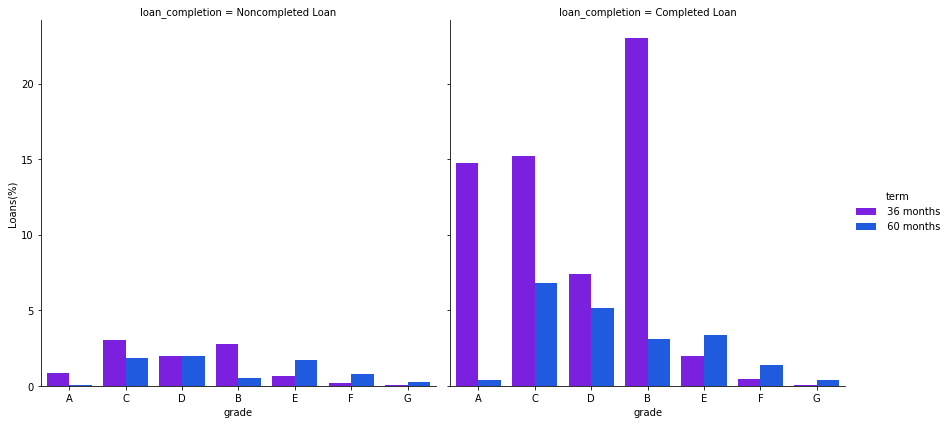

In [63]:
plt.figure(figsize=(12,6))

palette = sns.color_palette("gist_rainbow_r")
g = sns.catplot(x="grade", y="loan_amnt",
                col="loan_completion", hue="term", estimator=lambda y: len(y) / len(accepted) * 100,
                data=accepted, kind="bar", palette = palette,
                height=6, aspect=1)
g.set_ylabels("Loans(%)")
g.savefig('completionT.png')
g


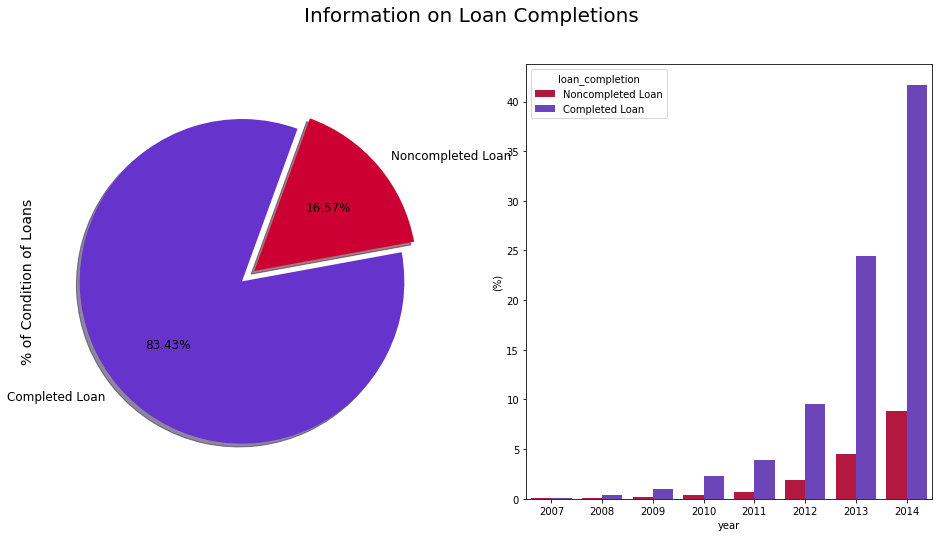

In [64]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#6633cc", "#cc0033"]
labels ="Completed Loan", "Noncompleted Loan"

plt.suptitle('Information on Loan Completions', fontsize=20)

accepted["loan_completion"].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)
#3791D7

ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

palette = [ "#cc0033","#6633cc"]

sns.barplot(x="year", y="loan_amnt", hue="loan_completion", data=accepted, palette=palette, estimator=lambda x: len(x) / len(accepted) * 100)
ax[1].set(ylabel="(%)")
plt.savefig('loanCompletion.png')

# Non-completed Loans by grades


In [65]:
# looking at only Non-completed Loans
default_cat_severe = ['Default', 'Charged Off','Does not meet the credit policy. Status:Charged Off']

accepted[accepted['loan_status'].isin(default_cat_severe)]
# check out the average interest rate and dti (debt-to-income)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,year,int_rate_bins,loan_condition,loan_completion
0,36805548,10400.0,10400.0,10400.000000,36 months,6.99,321.08,A,A3,Truck Driver Delivery Personel,...,NaN,NaN,NaN,NaN,NaN,NaN,2014,"(5.399, 9.548]",Bad Loan,Noncompleted Loan
3,37662224,7650.0,7650.0,7650.000000,36 months,13.66,260.20,C,C3,Technical Specialist,...,NaN,NaN,NaN,NaN,NaN,NaN,2014,"(9.548, 13.676]",Bad Loan,Noncompleted Loan
7,36804663,23325.0,23325.0,23325.000000,36 months,14.31,800.71,C,C4,Teacher,...,NaN,NaN,NaN,NaN,NaN,NaN,2014,"(13.676, 17.804]",Bad Loan,Noncompleted Loan
9,37800722,12975.0,12975.0,12975.000000,36 months,17.86,468.17,D,D5,Sales,...,NaN,NaN,NaN,NaN,NaN,NaN,2014,"(17.804, 21.932]",Bad Loan,Noncompleted Loan
12,37701596,10000.0,10000.0,10000.000000,36 months,11.99,332.10,B,B5,Investment Consultant,...,NaN,NaN,NaN,NaN,NaN,NaN,2014,"(9.548, 13.676]",Bad Loan,Noncompleted Loan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466305,1067799,15200.0,15200.0,14443.634553,60 months,17.27,379.97,D,D3,camp lejune fire dept,...,NaN,NaN,NaN,NaN,NaN,NaN,2012,"(13.676, 17.804]",Bad Loan,Noncompleted Loan
466311,1064950,4900.0,4900.0,4900.000000,60 months,16.77,121.18,D,D2,G4S Secure solution,...,NaN,NaN,NaN,NaN,NaN,NaN,2012,"(13.676, 17.804]",Bad Loan,Noncompleted Loan
466334,1063649,17500.0,16800.0,16775.000000,60 months,22.74,471.10,G,G1,Microsoft,...,NaN,NaN,NaN,NaN,NaN,NaN,2012,"(21.932, 26.06]",Bad Loan,Noncompleted Loan
466335,1062754,35000.0,22550.0,22550.000000,60 months,14.27,527.87,C,C2,Nucor Steel,...,NaN,NaN,NaN,NaN,NaN,NaN,2012,"(13.676, 17.804]",Bad Loan,Noncompleted Loan


In [66]:
len(accepted[accepted['loan_status'].isin(default_cat_severe)])

77261

In [67]:
tsevere=accepted[accepted['loan_status'].isin(default_cat_severe)].groupby(['grade','term','loan_status']).size()
tsevere = (tsevere*100)/len(accepted[accepted['loan_status'].isin(default_cat_severe)])
tsevere

grade  term        loan_status                                        
A       36 months  Charged Off                                             5.207026
                   Does not meet the credit policy. Status:Charged Off     0.010355
        60 months  Charged Off                                             0.188970
B       36 months  Charged Off                                            16.534862
                   Does not meet the credit policy. Status:Charged Off     0.102251
        60 months  Charged Off                                             3.053287
                   Default                                                 0.001294
                   Does not meet the credit policy. Status:Charged Off     0.007766
C       36 months  Charged Off                                            18.034972
                   Does not meet the credit policy. Status:Charged Off     0.181204
        60 months  Charged Off                                            10.984844
     

In [68]:
tsevere.describe()

count    28.000000
mean      3.571429
std       5.507130
min       0.001294
25%       0.046595
50%       0.185087
75%       4.934249
max      18.034972
dtype: float64

In [69]:
severe=accepted[accepted['loan_status'].isin(default_cat_severe)].groupby(['grade','term','loan_status']).size()
severe = (severe*100)/len(accepted[accepted['loan_status'].isin(default_cat_severe)])
severe = severe[severe>=4.934249]
severe.sort_values(inplace =True)
severe

grade  term        loan_status
A       36 months  Charged Off     5.207026
E       60 months  Charged Off    10.055526
C       60 months  Charged Off    10.984844
D       60 months  Charged Off    11.674713
        36 months  Charged Off    11.858506
B       36 months  Charged Off    16.534862
C       36 months  Charged Off    18.034972
dtype: float64

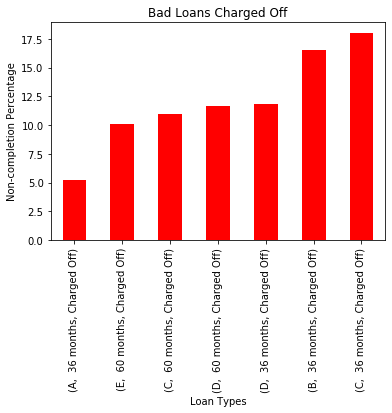

In [70]:
severe.plot(kind='bar', color='red')
#plt.title('Severe Bad Loans Portofolio Choices')
plt.title('Bad Loans Charged Off')
plt.xlabel('Loan Types')
plt.ylabel('Non-completion Percentage')
plt.savefig('loanchargedoff.png')


In [71]:
lsevere=accepted[accepted['loan_status'].isin(default_cat_severe)].groupby(['grade','term','loan_status']).size()
lsevere = (lsevere*100)/len(accepted[accepted['loan_status'].isin(default_cat_severe)])
lsevere = lsevere[lsevere<4.934249]
lsevere.sort_values(inplace =True)
lsevere

grade  term        loan_status                                        
B       60 months  Default                                                0.001294
                   Does not meet the credit policy. Status:Charged Off    0.007766
A       36 months  Does not meet the credit policy. Status:Charged Off    0.010355
C       60 months  Does not meet the credit policy. Status:Charged Off    0.010355
G       60 months  Does not meet the credit policy. Status:Charged Off    0.018120
F       60 months  Does not meet the credit policy. Status:Charged Off    0.023298
D       60 months  Does not meet the credit policy. Status:Charged Off    0.034946
E       60 months  Does not meet the credit policy. Status:Charged Off    0.050478
G       36 months  Does not meet the credit policy. Status:Charged Off    0.075070
F       36 months  Does not meet the credit policy. Status:Charged Off    0.097074
B       36 months  Does not meet the credit policy. Status:Charged Off    0.102251
G       36 month

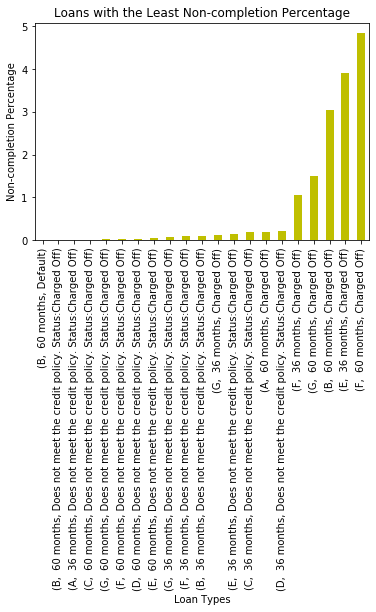

In [72]:
lsevere.plot(kind='bar', color ='y')
#plt.title('Least severe Bad Loans Portofolio Choices')
plt.title('Loans with the Least Non-completion Percentage')

plt.xlabel('Loan Types')
plt.ylabel('Non-completion Percentage')
plt.savefig('loanchargedoff1.png')

In [73]:
# miss= df.isnull().sum()
# miss = miss[miss > 0]
# miss.sort_values(inplace=True)
# miss

# by subgrades


In [74]:
tsevere2=accepted[accepted['loan_status'].isin(default_cat_severe)].groupby(['grade','sub_grade','term','loan_status']).size()
tsevere2 = (tsevere2*100)/len(accepted[accepted['loan_status'].isin(default_cat_severe)])
# tsevere = tsevere[tsevere>=10]
# tsevere.sort_values(inplace =True)
tsevere2

grade  sub_grade  term        loan_status                                        
A      A1          36 months  Charged Off                                            0.380528
       A2          36 months  Charged Off                                            0.608328
                              Does not meet the credit policy. Status:Charged Off    0.003883
                   60 months  Charged Off                                            0.001294
       A3          36 months  Charged Off                                            0.774000
                                                                                       ...   
G      G4          60 months  Does not meet the credit policy. Status:Charged Off    0.005177
       G5          36 months  Charged Off                                            0.010355
                              Does not meet the credit policy. Status:Charged Off    0.022003
                   60 months  Charged Off                               

In [75]:
tsevere2.describe()

count    127.000000
mean       0.787402
std        1.146024
min        0.001294
25%        0.012296
50%        0.046595
75%        1.255485
max        3.973544
dtype: float64

Text(0, 0.5, 'Non-completion Percentage')

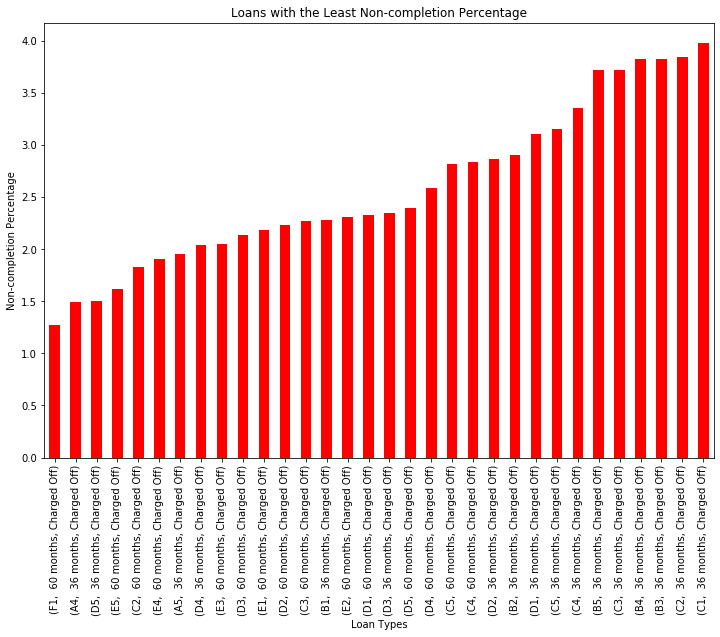

In [78]:
plt.figure(figsize =(12,8))
severe2=accepted[accepted['loan_status'].isin(default_cat_severe)].groupby(['sub_grade','term','loan_status']).size()
severe2 = (severe2*100)/len(accepted[accepted['loan_status'].isin(default_cat_severe)])
severe2 = severe2[severe2 >=1.255485]
severe2.sort_values(inplace =True)
severe2.plot(kind ='bar', color ='r')
plt.title('Loans with the Least Non-completion Percentage')
plt.xlabel('Loan Types')
plt.ylabel('Non-completion Percentage')

Text(0, 0.5, 'Non-completion Percentage')

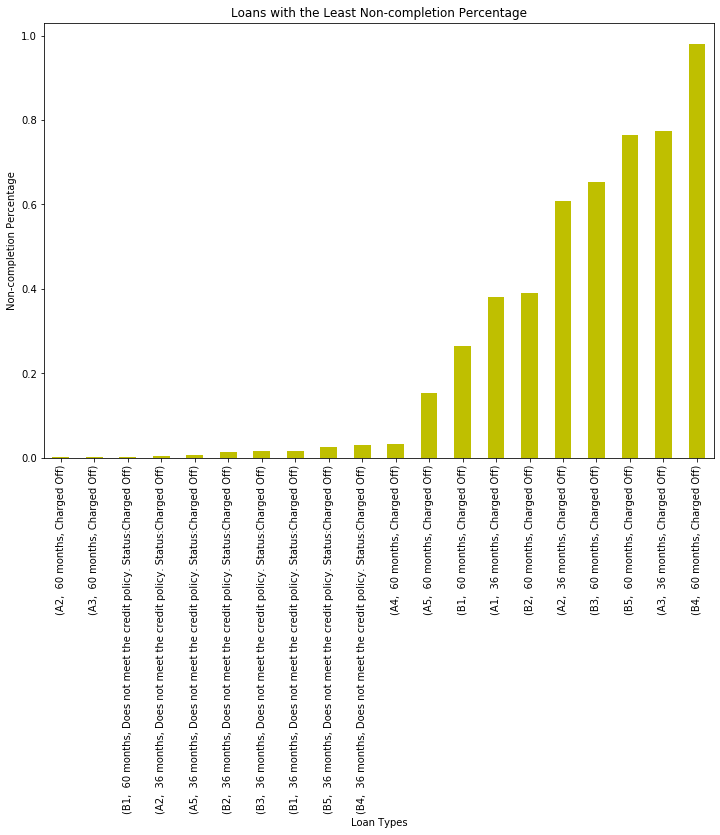

In [79]:
plt.figure(figsize =(12,8))
lsevere2=accepted[accepted['loan_status'].isin(default_cat_severe)].groupby(['sub_grade','term','loan_status']).size()
lsevere2 = (lsevere2*100)/len(accepted[accepted['loan_status'].isin(default_cat_severe)])
lsevere2 = lsevere2[lsevere2<1.255485].head(20)
lsevere2.sort_values(inplace =True)
lsevere2.plot(kind ='bar', color ='y')
plt.title('Loans with the Least Non-completion Percentage')
plt.xlabel('Loan Types')
plt.ylabel('Non-completion Percentage')

In [80]:
# accepted[accepted.groupby(['grade','sub_grade','term','loan_status']).isin(default_cat_severe)]
# (accepted[accepted['loan_status'].isin(default_cat_severe)].groupby(['grade','term','loan_status']).size())*100/len(accepted[accepted['loan_status'].isin(default_cat_severe)])

In [81]:
# (accepted[accepted['loan_status'].isin(default_cat_severe)].groupby(['grade','sub_grade','term','loan_status']).size())*100/len(accepted[accepted['loan_status'].isin(default_cat_severe)])

In [82]:
# plt.figure(figsize =(16,16))
# XB =(accepted[accepted['loan_status'].isin(default_cat_severe)].groupby(['purpose','loan_status']).size())*100/len(accepted[accepted['loan_status'].isin(default_cat_severe)])
# XB.plot(kind ='pie')

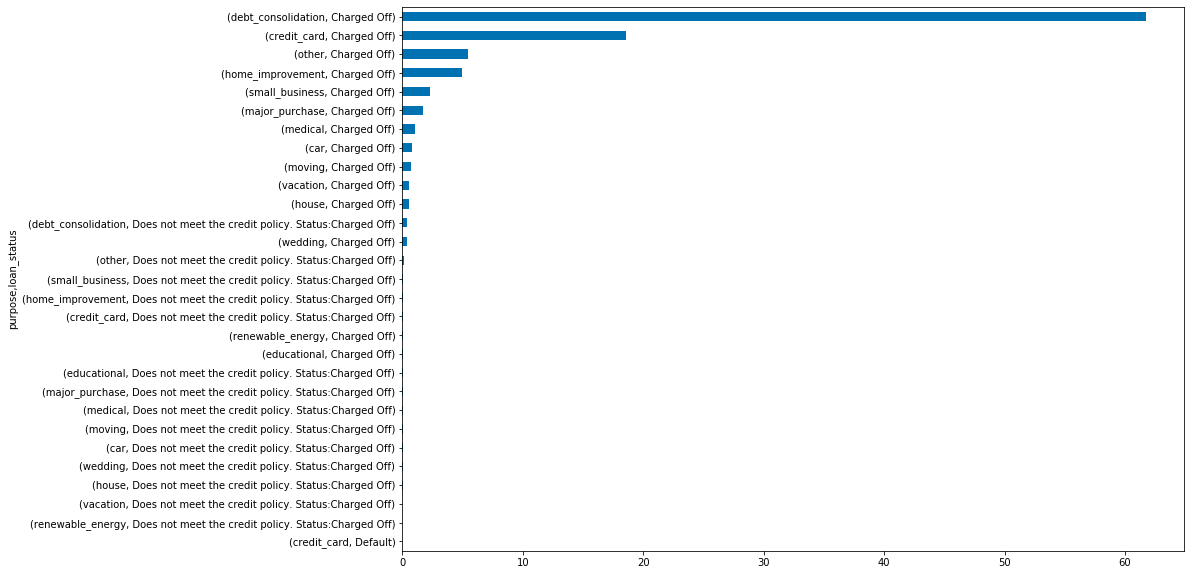

In [83]:
plt.figure(figsize =(14,10))
XB =(accepted[accepted['loan_status'].isin(default_cat_severe)].groupby(['purpose','loan_status']).size())*100/len(accepted[accepted['loan_status'].isin(default_cat_severe)])
XB.sort_values(inplace =True)
XB.plot(kind ='barh')


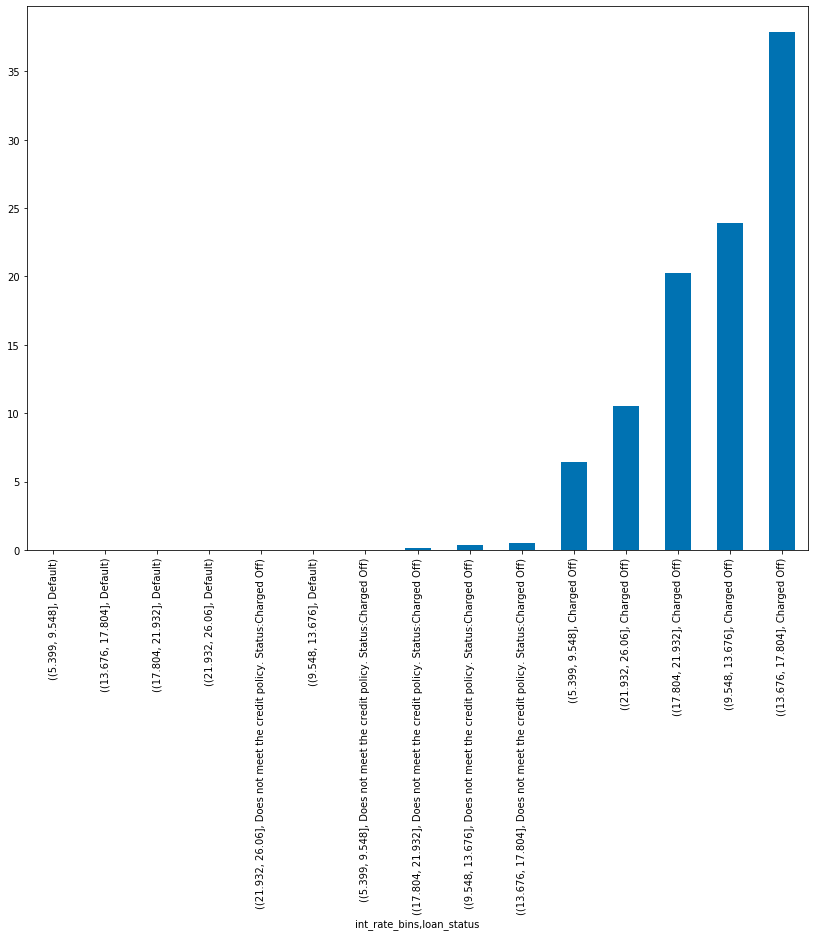

In [84]:
plt.figure(figsize =(14,10))
XB =(accepted[accepted['loan_status'].isin(default_cat_severe)].groupby(['int_rate_bins','loan_status']).size())*100/len(accepted[accepted['loan_status'].isin(default_cat_severe)])
XB.sort_values(inplace =True)
XB.plot(kind ='bar')

In [85]:
'funded_amnt', 'funded_amnt_inv'

('funded_amnt', 'funded_amnt_inv')

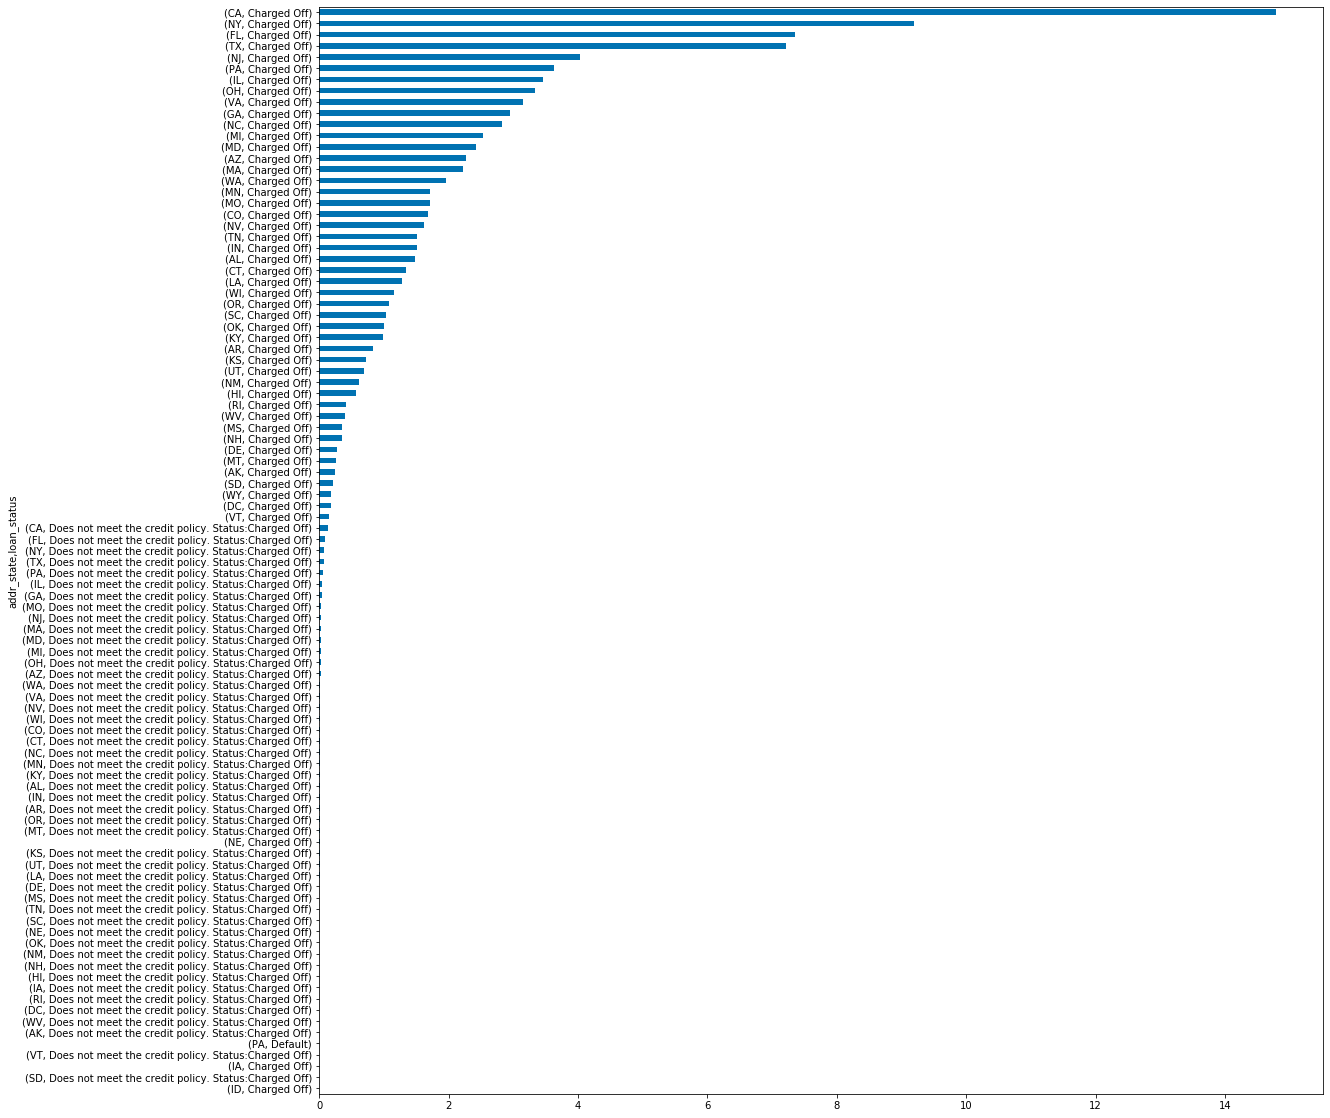

In [86]:
plt.figure(figsize =(18,20))
XB =(accepted[accepted['loan_status'].isin(default_cat_severe)].groupby(['addr_state','loan_status']).size())*100/len(accepted[accepted['loan_status'].isin(default_cat_severe)])
XB.sort_values(inplace =True)
XB.plot(kind ='barh')

In [87]:
accepted[accepted['loan_status'] == 'Default'].describe().T

,count,mean,std,min,25%,50%,75%,max
id,1.0,24776849.00,NaN,24776849.00,24776849.00,24776849.00,24776849.00,24776849.00
loan_amnt,1.0,12000.00,NaN,12000.00,12000.00,12000.00,12000.00,12000.00
funded_amnt,1.0,12000.00,NaN,12000.00,12000.00,12000.00,12000.00,12000.00
funded_amnt_inv,1.0,12000.00,NaN,12000.00,12000.00,12000.00,12000.00,12000.00
int_rate,1.0,12.49,NaN,12.49,12.49,12.49,12.49,12.49
installment,1.0,269.92,NaN,269.92,269.92,269.92,269.92,269.92
annual_inc,1.0,72000.00,NaN,72000.00,72000.00,72000.00,72000.00,72000.00
dti,1.0,14.92,NaN,14.92,14.92,14.92,14.92,14.92
delinq_2yrs,1.0,0.00,NaN,0.00,0.00,0.00,0.00,0.00
fico_range_low,1.0,670.00,NaN,670.00,670.00,670.00,670.00,670.00


In [88]:
# plt.figure(figsize=(12,8))
# sns.barplot('year', 'loan_amnt', data=accepted, palette='winter')
# plt.title('Issuance of Loans', fontsize=16)
# plt.xlabel('Year', fontsize=14)
# plt.ylabel('Loan amount issued', fontsize=14)
# plt.savefig('IssuanceofLoansYear.png')

In [89]:
# plt.figure(figsize=(12,8))
# sns.barplot('grade', 'loan_amnt', data=accepted, palette='winter_r')
# plt.title('Issuance of Loans by Grade', fontsize=16)
# plt.xlabel('Grade', fontsize=14)
# plt.ylabel('Loan amount issued', fontsize=14)
# plt.savefig('IssuanceofLoansgrade.png')

In [90]:
# plt.figure(figsize=(12,8))
# sns.barplot('grade', 'int_rate', data=accepted, palette='autumn_r',order =['A','B','C','D','E','F'])
# plt.title('Interest Rates by Grades', fontsize=16)
# plt.xlabel('Grade', fontsize=14)
# plt.ylabel('Interest Rates', fontsize=14)
# plt.savefig('IssuanceofLoansrate.png')

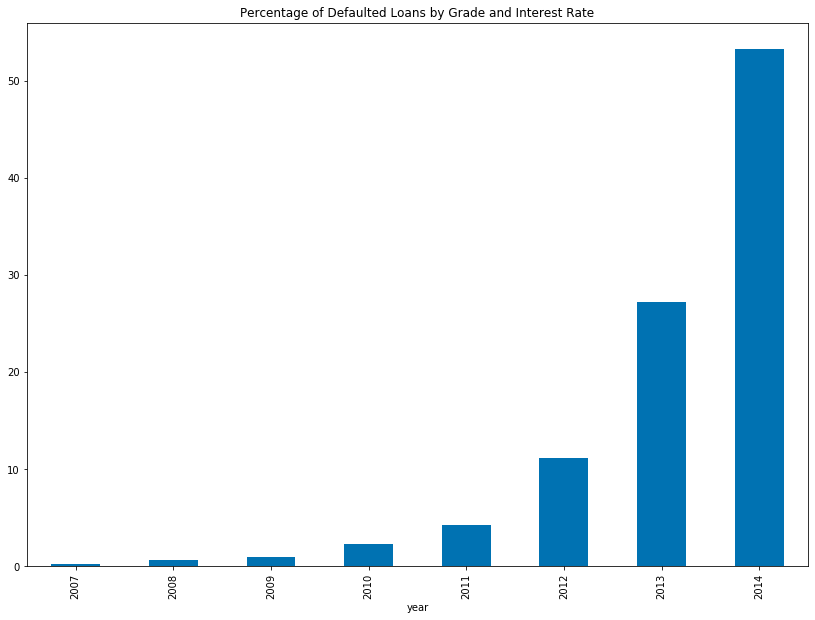

In [91]:
plt.figure(figsize =(14,10))
#XB1 =(accepted[accepted['loan_status'].isin(default_cat_severe)].groupby(['grade','int_rate_bins']).size())*100/len(accepted[accepted['loan_status'].isin(default_cat_severe)])
XB2 =(accepted[accepted['loan_status'].isin(default_cat_severe)].groupby(['year']).size())*100/len(accepted[accepted['loan_status'].isin(default_cat_severe)])
#XB1.head(10)
XB2.sort_values(inplace =True)
XB2.plot(kind ='bar', title ='Percentage of Defaulted Loans by Grade and Interest Rate')
# plt.savefig('Percentage of Defaulted Loans by Grade and Interest Rate.png')

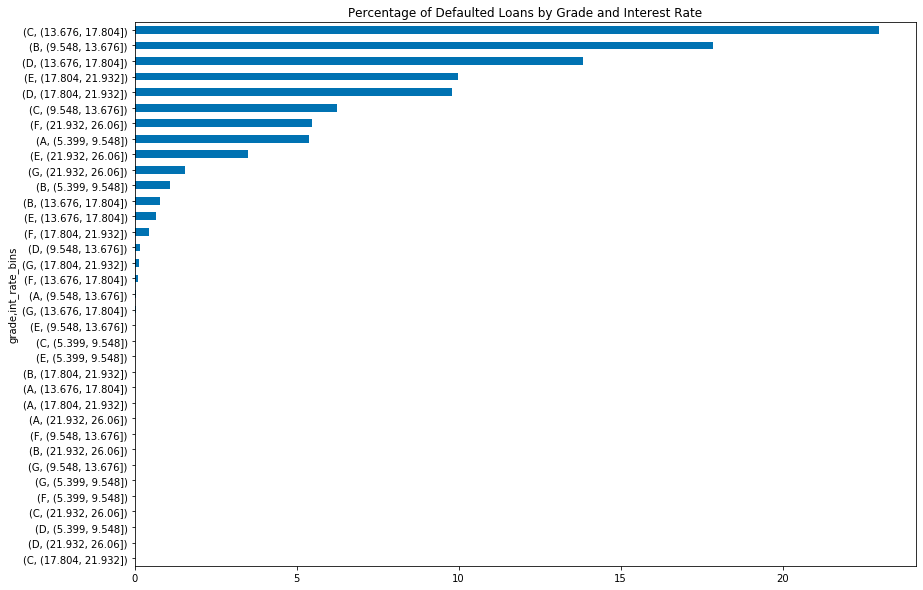

In [92]:
plt.figure(figsize =(14,10))
#XB1 =(accepted[accepted['loan_status'].isin(default_cat_severe)].groupby(['grade','int_rate_bins']).size())*100/len(accepted[accepted['loan_status'].isin(default_cat_severe)])
XB1 =(accepted[accepted['loan_status'].isin(default_cat_severe)].groupby(['grade','int_rate_bins']).size())*100/len(accepted[accepted['loan_status'].isin(default_cat_severe)])
#XB1.head(10)
XB1.sort_values(inplace =True)
XB1.plot(kind ='barh', title ='Percentage of Defaulted Loans by Grade and Interest Rate')
plt.savefig('Percentage of Defaulted Loans by Grade and Interest Rate.png')

In [93]:
#XB1.head(10)

# Loans and credit scores


In [94]:
#Loan issued by credit score [accepted['grade', 'subgrade','term','loan_status', 'fico_range_low', 'fico_range_high']]

In [95]:
accepted.groupby(['grade', 'sub_grade','term','loan_completion','fico_range_low']).size()

grade  sub_grade  term        loan_completion    fico_range_low
A      A1          36 months  Completed Loan     660.0             21
                                                 665.0             28
                                                 670.0             39
                                                 675.0             41
                                                 680.0             57
                                                                   ..
G      G5          60 months  Noncompleted Loan  705.0              1
                                                 710.0              1
                                                 725.0              1
                                                 730.0              1
                                                 760.0              1
Length: 3603, dtype: int64

In [96]:
#...

# Settlement loans


In [97]:
(accepted[accepted['settlement_percentage']>0].groupby(['grade', 'loan_status'])['settlement_percentage'].size())*100/len(accepted[accepted['settlement_percentage']>0])


grade  loan_status                                        
A      Charged Off                                             5.659792
B      Charged Off                                            18.917662
       Default                                                 0.015506
       Late (31-120 days)                                      0.015506
C      Charged Off                                            28.112886
       Does not meet the credit policy. Status:Charged Off     0.031013
       Late (31-120 days)                                      0.077531
D      Charged Off                                            24.360366
       Does not meet the credit policy. Status:Charged Off     0.031013
       Late (31-120 days)                                      0.124050
E      Charged Off                                            14.886029
       Does not meet the credit policy. Status:Charged Off     0.031013
       Late (31-120 days)                                      0.077531
F    

In [98]:
len(accepted[accepted['settlement_percentage']>0])*100/ len(accepted['settlement_percentage'])

1.3828817720786113

In [99]:
len(accepted['settlement_percentage'])

466345

In [100]:
accepted[accepted['settlement_percentage'].isna()].count()

id                 459896
loan_amnt          459896
funded_amnt        459896
funded_amnt_inv    459896
term               459896
                    ...  
settlement_term         0
year               459896
int_rate_bins      459896
loan_condition     459896
loan_completion    459896
Length: 154, dtype: int64

In [101]:
len(accepted[accepted['settlement_percentage'].isna()])

459896

In [102]:
len(accepted['settlement_percentage']) -len(accepted[accepted['settlement_percentage'].isna()])

6449

In [103]:
accepted[accepted['settlement_percentage']>0].count()

id                 6449
loan_amnt          6449
funded_amnt        6449
funded_amnt_inv    6449
term               6449
                   ... 
settlement_term    6449
year               6449
int_rate_bins      6449
loan_condition     6449
loan_completion    6449
Length: 154, dtype: int64

In [104]:
accepted['settlement_percentage'].isna().count()

466345

In [105]:
accepted['loan_settlement'] =np.nan
#settlement_cat = ['NaN', '0']

#accepted[accepted['loan_status'].isin(default_cat_severe)]

def loan_settlement(status):
   # if status in settlement_cat:
    #if status in (accepted[accepted['settlement_percentage'].isna()]['settlement_percentage']>0):
   # if status in (accepted['settlement_percentage']>0):
    if status in accepted['settlement_percentage'].isna(): #or status in accepted['settlement_percentage']<=0:
    #if status in accepted['settlement_percentage']== 'NaN' or status in accepted['settlement_percentage']<=0:
    #if accepted['settlement_percentage'].isna():
        return 'Settled Loan'
    else:
        return 'Nonsettled Loan'

accepted['loan_settlement']= accepted['settlement_percentage'].apply(loan_settlement)


In [106]:
accepted['loan_settlement'].value_counts()

Nonsettled Loan    462501
Settled Loan         3844
Name: loan_settlement, dtype: int64

In [107]:
accepted['settlement_percentage'].sort_values()

433704     0.20
76579      0.55
263803    10.69
232970    14.96
368965    15.00
          ...  
466340      NaN
466341      NaN
466342      NaN
466343      NaN
466344      NaN
Name: settlement_percentage, Length: 466345, dtype: float64

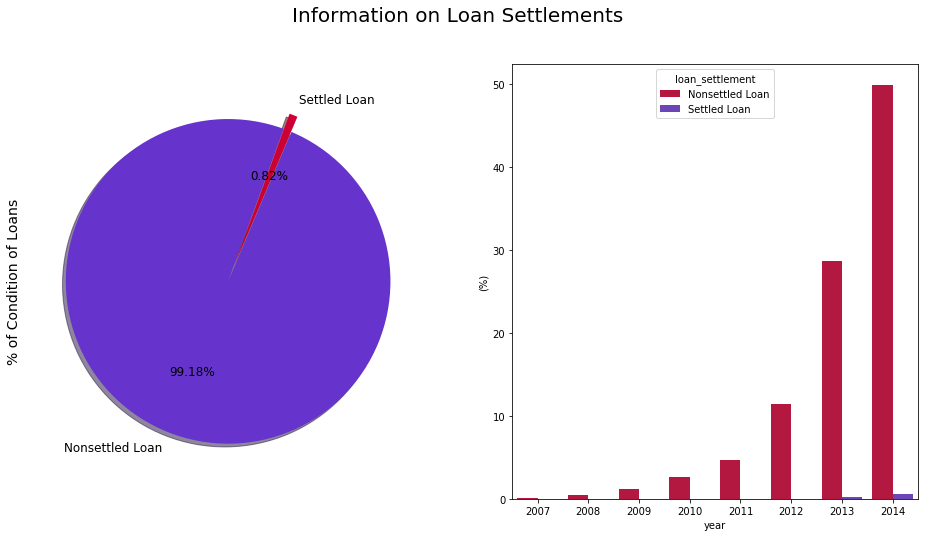

In [108]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#6633cc", "#cc0033"]
labels = "Nonsettled Loan" ,"Settled Loan"


plt.suptitle('Information on Loan Settlements', fontsize=20)

accepted["loan_settlement"].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)
#3791D7

ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

palette = [ "#cc0033","#6633cc"]

sns.barplot(x="year", y="loan_amnt", hue="loan_settlement", data=accepted, palette=palette, estimator=lambda x: len(x) / len(accepted) * 100)
ax[1].set(ylabel="(%)")

plt.savefig('Loan Settlements.png')

# Diversification: Portofolio building


In [109]:
# out_prncp Remaining outstanding principal for total amount funded

# out_prncp_inv Remaining outstanding principal for portion of total amount funded by investors


In [110]:
## N    - terms in months
### rate - monthly interest rate ~ annual interest rate/12

def Weighted_Average_Duration(N, rate):
    if np.isnan(N) or np.isnan(i): return np.nan
    
    p = 1.0-(np.exp(np.arange(N+1)*np.log(1+rate))-1)/(np.exp(N*np.log(1+rate))-1)
    # principals time series
    return np.sum(p)

def Total_Cumulative_Interest(N, rate):
    if np.isnan(N) or np.isnan(rate): return np.nan

    fac = np.exp(-N*np.log(1+rate))
    return N*rate/(1-fac)-1
    

In [111]:

rate = 20
i= rate*2
Weighted_Average_Duration(36, 20)
Total_Cumulative_Interest(36, 20)

719.0

In [112]:
accepted.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title',
       ...
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'year', 'int_rate_bins',
       'loan_condition', 'loan_completion', 'loan_settlement'],
      dtype='object', length=155)

In [113]:
#accepted.drop('loan_noncompleted',axis =1)###

In [114]:
accepted['loan_completion']

0         Noncompleted Loan
1            Completed Loan
2            Completed Loan
3         Noncompleted Loan
4            Completed Loan
                ...        
466340       Completed Loan
466341       Completed Loan
466342       Completed Loan
466343    Noncompleted Loan
466344       Completed Loan
Name: loan_completion, Length: 466345, dtype: object

In [115]:
import re
accepted["term"] = accepted["term"].apply(lambda x: re.sub('months', '',x)).astype('int64')                         

# df['row_parameter_name'] = df['row_parameter_name'].apply(lambda x: re.sub(';MEAN$',';X-BAR',x))

# accepted['term'] = accepted['term'].str.replace(r'\D', '').astype(int)

In [116]:
accepted["term"]

0         36
1         60
2         36
3         36
4         60
          ..
466340    36
466341    36
466342    36
466343    36
466344    60
Name: term, Length: 466345, dtype: int64

In [117]:
#returns 
current = accepted[accepted['loan_completion']=="Completed Loan"]
current = pd.DataFrame(current)
current["return"] = (current["installment"]*current["term"])-current["loan_amnt"]

In [118]:
# accepted['loan_completion'].value_counts()
current["return"]

1         5198.40
2         2155.08
4         6344.80
5         9556.60
6         3815.92
           ...   
466339    1517.64
466340    5727.44
466341    3790.92
466342    9273.16
466344    -835.20
Name: return, Length: 389084, dtype: float64

# 20 equal-dollar investments in 20 grade A loans


In [119]:
np.random.seed(42)
p1 =accepted[accepted['grade']=="A"].sample(n=20)
p1

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,year,int_rate_bins,loan_condition,loan_completion,loan_settlement
432152,1550794,12000.0,12000.0,12000.0,36,6.62,368.45,A,A2,US Army,...,NaN,NaN,NaN,NaN,NaN,2012,"(5.399, 9.548]",Good Loan,Completed Loan,Nonsettled Loan
422465,1825671,12000.0,12000.0,12000.0,36,8.90,381.04,A,A5,Marshall Public School District,...,NaN,NaN,NaN,NaN,NaN,2012,"(5.399, 9.548]",Good Loan,Completed Loan,Nonsettled Loan
231650,10182462,10000.0,10000.0,10000.0,36,7.62,311.62,A,A3,Cook,...,NaN,NaN,NaN,NaN,NaN,2014,"(5.399, 9.548]",Good Loan,Completed Loan,Nonsettled Loan
95770,23835830,20000.0,20000.0,20000.0,36,7.12,618.64,A,A3,Land Manager,...,NaN,NaN,NaN,NaN,NaN,2014,"(5.399, 9.548]",Good Loan,Completed Loan,Nonsettled Loan
147400,17754703,9000.0,9000.0,9000.0,36,6.03,273.92,A,A1,Accountant,...,NaN,NaN,NaN,NaN,NaN,2014,"(5.399, 9.548]",Good Loan,Completed Loan,Nonsettled Loan
187311,13177481,24000.0,24000.0,23900.0,36,7.62,747.88,A,A3,Physical Therapist,...,NaN,NaN,NaN,NaN,NaN,2014,"(5.399, 9.548]",Good Loan,Completed Loan,Nonsettled Loan
2170,8845947,11200.0,11200.0,11200.0,36,6.49,343.22,A,A2,accts payable,...,NaN,NaN,NaN,NaN,NaN,2014,"(5.399, 9.548]",Good Loan,Completed Loan,Nonsettled Loan
281155,8895538,8000.0,8000.0,8000.0,36,8.90,254.03,A,A5,President,...,NaN,NaN,NaN,NaN,NaN,2013,"(5.399, 9.548]",Good Loan,Completed Loan,Nonsettled Loan
41890,32018659,5000.0,5000.0,5000.0,36,7.12,154.66,A,A3,NaN,...,NaN,NaN,NaN,NaN,NaN,2014,"(5.399, 9.548]",Good Loan,Completed Loan,Nonsettled Loan
165186,15600422,21000.0,21000.0,20850.0,36,7.90,657.10,A,A4,Rural Mail Carrier,...,NaN,NaN,NaN,NaN,NaN,2014,"(5.399, 9.548]",Good Loan,Completed Loan,Nonsettled Loan


In [120]:
# 20 equal-dollar investments in 20 grade A loans.

In [121]:
p1['funded_amnt_inv']=20


In [122]:
p1['funded_amnt_inv']
# current = accepted[accepted['loan_completion']=="Completed Loan"]
# current = pd.DataFrame(current)
# current["return"] = (current["installment"]*current["term"])-current["loan_amnt"]

432152    20
422465    20
231650    20
95770     20
147400    20
187311    20
2170      20
281155    20
41890     20
165186    20
417316    20
74625     20
42183     20
244794    20
166733    20
442151    20
148352    20
116525    20
48050     20
452860    20
Name: funded_amnt_inv, dtype: int64

In [123]:
# A = P*i*((1+i)**n)/(((1+i)**n)-1)
p1['term']

432152    36
422465    36
231650    36
95770     36
147400    36
187311    36
2170      36
281155    36
41890     36
165186    36
417316    36
74625     36
42183     36
244794    36
166733    36
442151    36
148352    36
116525    36
48050     36
452860    36
Name: term, dtype: int64

In [124]:
p1['int_rate']

432152    6.62
422465    8.90
231650    7.62
95770     7.12
147400    6.03
187311    7.62
2170      6.49
281155    8.90
41890     7.12
165186    7.90
417316    7.90
74625     8.39
42183     8.39
244794    5.42
166733    7.62
442151    8.90
148352    6.03
116525    7.12
48050     6.03
452860    6.62
Name: int_rate, dtype: float64

In [125]:
#p1['int_rate']
p1['A'] =(p1['funded_amnt_inv']*(p1['int_rate']/1200)*((1+(p1['int_rate']/1200))**p1['term']))/(((1+(p1['int_rate']/1200))**p1['term'])-1)

In [126]:
p1['A']

432152    0.614073
422465    0.635064
231650    0.623227
95770     0.618640
147400    0.608711
187311    0.623227
2170      0.612889
281155    0.635064
41890     0.618640
165186    0.625805
417316    0.625805
74625     0.630332
42183     0.630332
244794    0.603197
166733    0.623227
442151    0.635064
148352    0.608711
116525    0.618640
48050     0.608711
452860    0.614073
Name: A, dtype: float64

In [127]:
p1["return"] = (p1['A']*p1["term"])-p1['funded_amnt_inv']

In [128]:
p1["return"]

432152    2.106629
422465    2.862313
231650    2.436179
95770     2.271034
147400    1.913583
187311    2.436179
2170      2.064005
281155    2.862313
41890     2.271034
165186    2.528983
417316    2.528983
74625     2.691946
42183     2.691946
244794    1.715079
166733    2.436179
442151    2.862313
148352    1.913583
116525    2.271034
48050     1.913583
452860    2.106629
Name: return, dtype: float64

# 100 equal-dollar investments in 100 grade A loans


In [129]:
np.random.seed(2)
p2 =accepted[accepted['grade']=="A"].sample(n=100)
p2.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,year,int_rate_bins,loan_condition,loan_completion,loan_settlement
77095,27340357,25000.0,25000.0,25000.0,36,7.12,773.30,A,A3,Police Officer,...,NaN,NaN,NaN,NaN,NaN,2014,"(5.399, 9.548]",Good Loan,Completed Loan,Nonsettled Loan
101837,23373111,8000.0,8000.0,8000.0,36,7.69,249.55,A,A4,Dental Hygienist,...,NaN,NaN,NaN,NaN,NaN,2014,"(5.399, 9.548]",Good Loan,Completed Loan,Nonsettled Loan
256811,647574,5000.0,5000.0,5000.0,36,6.54,153.34,A,A4,Dolphin Bay Resort& Spa,...,NaN,NaN,NaN,NaN,NaN,2011,"(5.399, 9.548]",Bad Loan,Noncompleted Loan,Nonsettled Loan
48239,30896056,8000.0,8000.0,8000.0,36,8.39,252.14,A,A5,NaN,...,NaN,NaN,NaN,NaN,NaN,2014,"(5.399, 9.548]",Good Loan,Completed Loan,Nonsettled Loan
140803,18785115,15000.0,15000.0,15000.0,36,7.12,463.98,A,A3,Senior Human Resources Business Partner,...,NaN,NaN,NaN,NaN,NaN,2014,"(5.399, 9.548]",Good Loan,Completed Loan,Nonsettled Loan


In [130]:
p2['funded_amnt_inv']=100

In [131]:
p2['A'] =(p2['funded_amnt_inv']*(p2['int_rate']/1200)*((1+(p2['int_rate']/1200))**p2['term']))/(((1+(p2['int_rate']/1200))**p2['term'])-1)

In [132]:
p2["return"] = (p2['A']*p2["term"])-p2['funded_amnt_inv']
p2["return"]

77095     11.355172
101837    12.296792
256811    10.401965
48239     13.459730
140803    11.355172
423180    12.180896
163824    12.180896
303707    10.533146
445288    12.180896
464565    12.644914
388188    14.311563
456274    12.180896
367154     9.567916
131287     9.567916
230852    10.533146
266073    12.611732
244607     8.575394
1640      11.965852
154419    13.459730
40837     11.355172
464849    12.644914
16431     13.126725
259539     9.796487
1918      10.320025
393407    14.311563
267205    12.611732
450684     9.567916
363010    14.311563
379172    14.311563
108137    12.296792
116740    10.320025
444948    14.311563
176038    12.644914
256336     8.575394
183094    12.180896
164498    10.533146
254797    11.635504
31945     13.459730
151832    12.296792
337720    10.533146
423545    14.311563
109253    13.459730
197108    12.644914
34206     11.355172
236548    14.311563
406727    12.180896
103650    12.296792
425720     9.567916
287806    14.311563
109471    11.355172


# 20 equal-dollar investments in 5+5+5+5 loans in grade 𝐴,𝐵,𝐶,𝐷 , respectively, 5 in each grade


In [133]:
np.random.seed(2)
# p2 =accepted[accepted['grade']=="A"].sample(n=100)
# p2.head(5)
rowsg =['A','B','C','D']

p3 =accepted[accepted['grade'].isin(rowsg)].groupby('grade')

p3= p3.apply(lambda x: x.sample(n=5, replace=True)).head(15)
p3
# grouped = accepted.groupby('grade')
# grouped.apply(lambda x: x.sample(n=5, replace=True)).head(15)

id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
grade                                                                   
A     457151   1218131     5000.0       5000.0      5000.000000    36   
      268462    478080     5000.0       5000.0      4875.000000    36   
      201271  12439279     6000.0       6000.0      6000.000000    36   
      221136  11235305    21000.0      21000.0     21000.000000    36   
      267167    494942    11200.0      11200.0     10075.000000    36   
B     208422  12234981     9000.0       9000.0      9000.000000    36   
      130479  19957210     9050.0       9050.0      9050.000000    36   
      170837  15189195    35000.0      35000.0     34900.000000    36   
      139283  18936035    20000.0      20000.0     20000.000000    36   
      264980    524205    18000.0      12700.0     12125.000000    60   
C     38727   31527540     5000.0       5000.0      5000.000000    36   
      115551  21010784     7275.0       7275.0      7275.000000    36   
      185558  12476026    10000.0      10000.0     10000.000000    36   
      265044    523301    25000.0      15525.0     13546.483211    60   
      147791  17433347     6000.0       6000.0      6000.000000    36   

              int_rate  installment grade sub_grade  \
grade                                                 
A     457151      7.90       156.46     A        A4   
      268462      7.74       156.10     A        A3   
      201271      6.03       182.62     A        A1   
      221136      8.90       666.82     A        A5   
      267167      7.14       346.52     A        A3   
B     208422     10.99       294.61     B        B2   
      130479      9.17       288.51     B        B1   
      170837     11.99      1162.34     B        B3   
      139283     11.67       661.14     B        B4   
      264980     11.12       276.89     B        B3   
C     38727      14.49       172.09     C        C4   
      115551     14.99       252.16     C        C5   
      185558     14.64       344.90     C        C3   
      265044     13.98       361.08     C        C3   
      147791     12.99       202.14     C        C1   

                                     emp_title  ... settlement_status  \
grade                                           ...                     
A     457151         Derouen's Heavy Equipment  ...               NaN   
      268462                               NaN  ...               NaN   
      201271                            Rector  ...               NaN   
      221136                          Director  ...               NaN   
      267167                   EXETER HOSPITAL  ...               NaN   
B     208422            Water Systems Mech ll   ...               NaN   
      130479           Director & Photographer  ...               NaN   
      170837                   Project Manager  ...               NaN   
      139283                           Teacher  ...               NaN   
      264980      UGL- Unicco Services Company  ...               NaN   
C     38727                      Store Manager  ...               NaN   
      115551                   anesthesia tech  ...               NaN   
      185558                               NaN  ...               NaN   
      265044  Baylor All Saints Medical Center  ...               NaN   
      147791                automotive painter  ...               NaN   

             settlement_date  settlement_amount settlement_percentage  \
grade                                                                   
A     457151             NaN                NaN                   NaN   
      268462             NaN                NaN                   NaN   
      201271             NaN                NaN                   NaN   
      221136             NaN                NaN                   NaN   
      267167             NaN                NaN                   NaN   
B     208422             NaN                NaN                   NaN   
      130479    

In [134]:
p3['funded_amnt_inv']=100

In [135]:
p3['A'] =(p3['funded_amnt_inv']*(p3['int_rate']/1200)*((1+(p3['int_rate']/1200))**p3['term']))/(((1+(p3['int_rate']/1200))**p3['term'])-1)

In [136]:
p3["return"] = (p3['A']*p3["term"])-p3['funded_amnt_inv']
p3["return"]

grade        
A      457151    12.644914
       268462    12.379619
       201271     9.567916
       221136    14.311563
       267167    11.388130
B      208422    17.842334
       130479    14.764083
       170837    19.554322
       139283    19.004897
       264980    30.813896
C      38727     23.897962
       115551    24.777554
       185558    24.161461
       265044    39.547300
       147791    21.280888
Name: return, dtype: float64

# 100 equal-dollar investments in 25+25+25+25 loans in grade 𝐴,𝐵,𝐶,𝐷 , respectively, 25 loans in each grade




In [137]:
np.random.seed(2)
# p2 =accepted[accepted['grade']=="A"].sample(n=100)
# p2.head(5)
rowsg =['A','B','C','D']

p4 =accepted[accepted['grade'].isin(rowsg)].groupby('grade')

p4 =p4.apply(lambda x: x.sample(n=25, replace=True))
p4

id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
grade                                                                   
A     457151   1218131     5000.0       5000.0      5000.000000    36   
      268462    478080     5000.0       5000.0      4875.000000    36   
      201271  12439279     6000.0       6000.0      6000.000000    36   
      221136  11235305    21000.0      21000.0     21000.000000    36   
      267167    494942    11200.0      11200.0     10075.000000    36   
      331532   7005693     5000.0       5000.0      5000.000000    36   
      216709  11614602    28000.0      28000.0     28000.000000    36   
      264055    538613     1500.0       1500.0      1500.000000    36   
      231740  10152511     6000.0       6000.0      6000.000000    36   
      451276   1283689    30000.0      30000.0     30000.000000    36   
      61948   28863719     6000.0       6000.0      6000.000000    36   
      208620  12355632     8000.0       8000.0      8000.000000    36   
      312616   7804592    24000.0      24000.0     23950.000000    36   
      456785   1219204    12000.0      12000.0     12000.000000    36   
      254577    685713    10000.0      10000.0     10000.000000    36   
      312168   7915806    10000.0      10000.0     10000.000000    36   
      128761  20127624     9000.0       9000.0      9000.000000    36   
      392368   3697500    24000.0      24000.0     24000.000000    36   
      46994   31266822    19000.0      19000.0     19000.000000    36   
      88361   25276880     4000.0       4000.0      4000.000000    36   
      117431  21059526    28000.0      28000.0     28000.000000    36   
      93045   24775075     6000.0       6000.0      6000.000000    36   
      356539   5957530    16500.0      16500.0     16450.000000    36   
      251627    740129     8500.0       8500.0      8500.000000    36   
      345247   6375364    21800.0      21800.0     21750.000000    36   
B     386099   4186486    18225.0      18225.0     18175.000000    36   
      363665   5775719    16000.0      16000.0     15950.000000    36   
      407257   3160366    14000.0      14000.0     14000.000000    36   
      76829   27710315    20000.0      20000.0     20000.000000    36   
      445606   1395788     8500.0       8500.0      8475.000000    36   
      201130  12469220    13600.0      13600.0     13575.000000    36   
      446382   1386451    30000.0      30000.0     30000.000000    60   
      230202  10394800    10000.0      10000.0     10000.000000    36   
      342021   6522631     6000.0       6000.0      6000.000000    36   
      393119   3666991    28000.0      28000.0     27950.000000    36   
      446596   1383855     4800.0       4800.0      4800.000000    36   
      122444  20049150    11600.0      11600.0     11575.000000    36   
      103111  22572565    11700.0      11700.0     11700.000000    36   
      88103   23856321    24000.0      24000.0     24000.000000    36   
      130205  19907482     6000.0       6000.0      6000.000000    36   
      207665  12266825    17600.0      17600.0     17400.000000    36   
      73510   27542243     5000.0       5000.0      5000.000000    36   
      140664  18815194    14125.0      14125.0     14125.000000    36   
      92035   24715662    20000.0      20000.0     20000.000000    36   
      86865   25317394    24000.0      24000.0     24000.000000    60   
      149879  17473206    20000.0      20000.0     20000.000000    36   
      135134  19335976    22000.0      22000.0     22000.000000    36   
      323766   7276157    14000.0      14000.0     14000.000000    36   
      54433   30205873    15000.0      15000.0     14975.000000    36   
      115513  21229924    11000.0      11000.0     11000.000000    36   
C     200523  12335544    10000.0      10000.0     10000.000000    60   
      296677   7637782    10000.0      10000.0     10000.000000    36   
      331452   6995922    15000.0      15000.0     15000.000000    60   
     

In [138]:
p4['funded_amnt_inv']=100

In [139]:
p4['A'] =(p4['funded_amnt_inv']*(p4['int_rate']/1200)*((1+(p4['int_rate']/1200))**p4['term']))/(((1+(p4['int_rate']/1200))**p4['term'])-1)

In [140]:
p4["return"] = (p4['A']*p4["term"])-p4['funded_amnt_inv']
p4["return"]

grade        
A      457151    12.644914
       268462    12.379619
       201271     9.567916
       221136    14.311563
       267167    11.388130
       331532    12.180896
       216709    12.180896
       264055    12.611732
       231740    12.644914
       451276    14.311563
       61948     10.320025
       208620    12.644914
       312616    13.810021
       456785    10.533146
       254577    12.247113
       312168    14.898369
       128761    12.296792
       392368    14.311563
       46994      9.567916
       88361     11.355172
       117431    13.459730
       93045     13.459730
       356539    12.644914
       251627    11.635504
       345247    10.533146
B      386099    16.432490
       363665    18.098201
       407257    18.098201
       76829     19.004897
       445606    18.098201
       201130    20.415786
       446382    36.856537
       230202    19.554322
       342021    18.799248
       393119    16.432490
       446596    18.098201
       122444 

# Or you can invest 1% (of the loan amount) and diversify into many loans


In [141]:
np.random.seed(0)
p5 = accepted.sample(frac=0.001)

In [142]:
p5

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,year,int_rate_bins,loan_condition,loan_completion,loan_settlement
204092,11865297,25000.0,25000.0,24875.000000,36,12.99,842.23,B,B5,registered nurse,...,NaN,NaN,NaN,NaN,NaN,2014,"(9.548, 13.676]",Good Loan,Completed Loan,Nonsettled Loan
42129,32128404,35000.0,35000.0,35000.000000,36,18.24,1269.56,D,D5,Program Specialist,...,NaN,NaN,NaN,NaN,NaN,2014,"(17.804, 21.932]",Good Loan,Completed Loan,Nonsettled Loan
368037,5645407,21625.0,21625.0,21625.000000,60,23.28,613.11,F,F2,southerland global services,...,NaN,NaN,NaN,NaN,NaN,2013,"(21.932, 26.06]",Good Loan,Completed Loan,Nonsettled Loan
178229,14548018,35000.0,35000.0,34975.000000,60,18.92,906.38,D,D4,General Manager,...,NaN,NaN,NaN,NaN,NaN,2014,"(17.804, 21.932]",Bad Loan,Noncompleted Loan,Nonsettled Loan
166196,15549968,6075.0,6075.0,6075.000000,36,15.61,212.42,C,C5,Management,...,NaN,NaN,NaN,NaN,NaN,2014,"(13.676, 17.804]",Good Loan,Completed Loan,Nonsettled Loan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123628,20408562,4500.0,4500.0,4500.000000,36,9.17,143.46,B,B1,bakery associate,...,NaN,NaN,NaN,NaN,NaN,2014,"(5.399, 9.548]",Good Loan,Completed Loan,Nonsettled Loan
460893,1158515,27500.0,27500.0,27469.169545,60,13.99,639.74,C,C1,Shaffers Electric,...,NaN,NaN,NaN,NaN,NaN,2012,"(13.676, 17.804]",Good Loan,Completed Loan,Nonsettled Loan
432092,1551472,6000.0,6000.0,6000.000000,36,7.62,186.97,A,A3,Rockdale BOC,...,NaN,NaN,NaN,NaN,NaN,2012,"(5.399, 9.548]",Good Loan,Completed Loan,Nonsettled Loan
426866,1615240,12000.0,12000.0,12000.000000,36,14.09,410.66,B,B5,Pathway Inc.,...,NaN,NaN,NaN,NaN,NaN,2012,"(13.676, 17.804]",Good Loan,Completed Loan,Nonsettled Loan


In [143]:
p5['funded_amnt_inv']=10000/100

In [144]:
p5['funded_amnt_inv']

204092    100.0
42129     100.0
368037    100.0
178229    100.0
166196    100.0
          ...  
123628    100.0
460893    100.0
432092    100.0
426866    100.0
225122    100.0
Name: funded_amnt_inv, Length: 466, dtype: float64

In [145]:
p5['A'] =(p5['funded_amnt_inv']*(p5['int_rate']/1200)*((1+(p5['int_rate']/1200))**p5['term']))/(((1+(p5['int_rate']/1200))**p5['term'])-1)


In [146]:
# (((p5['int_rate']/120) +1)**p5['term'])*

In [147]:
p5['funded_amnt_inv']*(p5['int_rate']/1200)*((1+(p5['int_rate']/1200))**p5['term'])

204092    1.595008
42129     2.616384
368037    6.144400
178229    4.030671
166196    2.071526
            ...   
123628    1.005098
460893    2.337051
432092    0.797516
426866    1.787461
225122    0.833751
Length: 466, dtype: float64

In [148]:
p5['A']

204092    3.368914
42129     3.627291
368037    2.835157
178229    2.589655
166196    3.496479
            ...   
123628    3.187891
460893    2.326307
432092    3.116136
426866    3.422136
225122    3.129025
Name: A, Length: 466, dtype: float64

In [149]:
p5["return"] = (p5['A']*p5["term"])-p5['funded_amnt_inv']
p5["return"]

204092    21.280888
42129     30.582459
368037    70.109446
178229    55.379311
166196    25.873254
            ...    
123628    14.764083
460893    39.578401
432092    12.180896
426866    23.196890
225122    12.644914
Name: return, Length: 466, dtype: float64

In [150]:
## N    - terms in months
### rate - monthly interest rate ~ annual interest rate/12

def Weighted_Average_Duration(N, rate):
    if np.isnan(N) or np.isnan(i): return np.nan
    
    p = 1.0-(np.exp(np.arange(N+1)*np.log(1+rate))-1)/(np.exp(N*np.log(1+rate))-1)
    # principals time series
    return np.sum(p)

def Total_Cumulative_Interest(N, rate):
    if np.isnan(N) or np.isnan(rate): return np.nan

    fac = np.exp(-N*np.log(1+rate))
    return N*rate/(1-fac)-1
    